
<img src=https://www.iteda.cnea.gov.ar/sites/default/files/garland_iteda_logo.png align='left' height=115>

<img src=https://www.facet.unt.edu.ar/facetinforma/wp-content/uploads/sites/9/2015/11/it-OP1-Transparente.png align='right' height=115>

---
---
  
# Análisis Estadístico de Datos - 2023

* **Profesor:** Diego Ravignani Guerrero
* **JTP:** Ezequiel Enrique Rodriguez

---
---

![](https://drive.google.com/uc?id=1GHUnADF_bTx-x6UEIZRDAYZyL7v_5Cib)

## Intervalo aproximado

In [1]:
import math
import numpy as np
from scipy.stats import norm
import matplotlib.pyplot as plt

Parámetro de la exponencial

In [2]:
tau = 10

Tamaño de la muestra

In [3]:
n = 5

Nivel de confianza

In [4]:
CL = 0.9

In [5]:
proba_cola = (1 - CL)/2
proba_cola

0.04999999999999999

Cuantil

In [6]:
q = -norm.ppf(proba_cola)
q

1.6448536269514729

Número de simulaciones

In [7]:
numero_simulaciones = 10000

Contador de exitos

Generador de números aleatorios

In [8]:
rng = np.random.default_rng()

Genero los datos y lleno el histograma

In [9]:
numero_exitos = 0

tau_hat_list = []

for i in range(numero_simulaciones):
    datos = rng.exponential(tau, n)
    tau_est = np.mean(datos)
    tau1 = tau_est / (1+q/math.sqrt(n))
    tau2 = tau_est / (1-q/math.sqrt(n))
    if tau1 < tau and tau < tau2:
        numero_exitos = numero_exitos + 1

    tau_hat_list.append(tau_est)

In [10]:
print(numero_exitos)

9143


Cobertura

In [11]:
cobertura = numero_exitos / numero_simulaciones

In [12]:
print(f'Cobertura: {cobertura*100:2.1f}%')

Cobertura: 91.4%


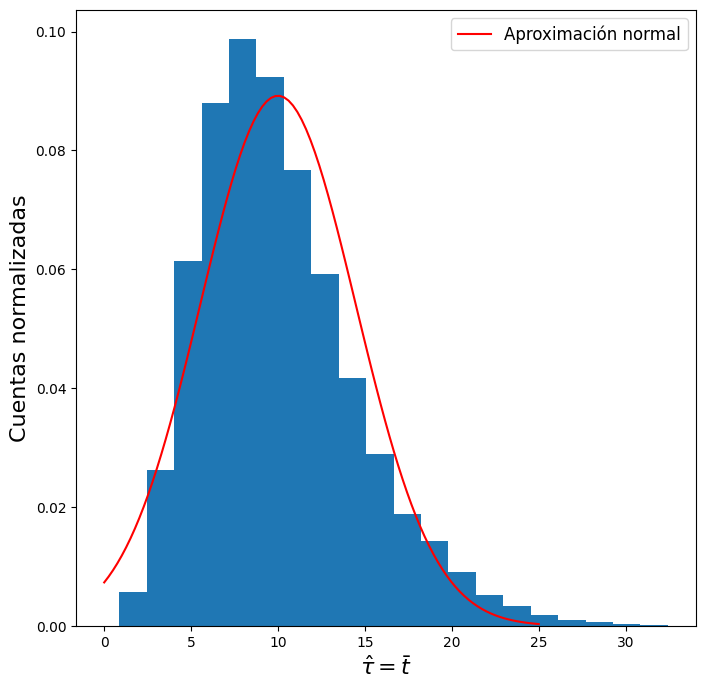

In [13]:
tau_space = np.linspace(0,25,100)
fig, ax = plt.subplots(figsize=(8,8))
ax.hist(tau_hat_list, density=True, bins=20)
ax.plot(tau_space, norm.pdf(tau_space, loc=tau, scale=tau/np.sqrt(n)),
        color="red", label="Aproximación normal")
ax.set_xlabel(r"$\hat{\tau}=\bar{t}$", fontsize=16)
ax.set_ylabel("Cuentas normalizadas", fontsize=16)
plt.legend(fontsize=12)
plt.show()